In [2]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


# Segmentation types

Before you start working on an image segmentation task, it's crucial to know what type of segmentation is required, as it impacts model architecture choices.

![Answer](/home/nero/Documents/Estudos/DataCamp/Python/courses/deep-learning-for-images-with-pytorch/segmentation_types.png)


In [1]:
from PIL import Image
import torchvision.transforms as transforms
import torch

In [23]:
# exercise 01

"""
Creating binary masks

Images for segmentation tasks are typically annotated with pixel-level masks. Consider this image of an Egyptian Mau cat.

cat image

In this and the next exercise, you will use the corresponding mask to segment the cat out of the image. First, you will need to load the mask and binarize it.

Image from PIL, transforms from torchvision, and torch have already been imported for you.
"""

# Instructions

"""

    Load the mask image stored in annotations/Egyptian_Mau_123.png and assign it to mask.

    Create a binary_mask from mask_tensor where each pixel equal to 1/255 is assigned a tensor value of 1.0, and the remaining pixels are assigned a tensor value of 0.0.

"""

# solution

# Load mask image
#mask = Image.open('annotations/Egyptian_Mau_123.png')
mask = Image.open(path_data+'mask.png')

# Transform mask to tensor
transform = transforms.Compose([transforms.ToTensor()])
mask_tensor = transform(mask)

# Create binary mask
binary_mask = torch.where(
    mask_tensor==1/255, 
    torch.tensor(1.0),
    torch.tensor(0.0),
)

binary_mask = binary_mask[:3, :, :] 

# Print unique mask values
print(binary_mask.unique())

#----------------------------------#

# Conclusion

"""
Nice! It's important to remember that the toTensor() transformation normalizes the pixel values by dividing them by 255. Now that you can binarize a segmentation mask, let's use it to segment an image!
"""

tensor([0., 1.])


"\nNice! It's important to remember that the toTensor() transformation normalizes the pixel values by dividing them by 255. Now that you can binarize a segmentation mask, let's use it to segment an image!\n"

In [16]:
import matplotlib.pyplot as plt

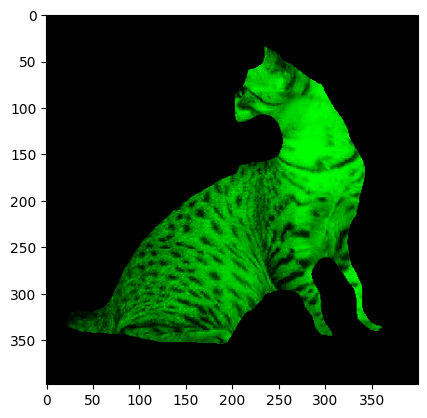

"\nGood job! You know how annotation masks work for image segmentation. Now, let's look at how to use machine learning models to predict those masks for unlabeled images!\n"

In [24]:
# exercise 02

"""
Segmenting image with a mask

With the binary mask ready, you can use it to segment the object, that is the cat, out of the image.

To do so, you will need to load the original image and transform it to a tensor. Next, you will create the object tensor by masking the original image. Finally, you will display the result.

transforms from torchvision have been imported, and the binary_mask you created in the previous exercise is available to you.
"""

# Instructions

"""

    Create image_tensor by applying the toTensor() transform to the raw image.

    Segment the image by masking the image_tensor with the binary_mask, assigning the result to object_tensor.

    Apply the already defined to_pil_image transform to the object_tensor in order to display it.

"""

# solution

# Load image and transform to tensor
image = Image.open(path_data+"Egyptian_Mau_123.jpg")
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image)

# Segment object out of the image
object_tensor = binary_mask * image_tensor

# Convert segmented object to image and display
to_pil_image = transforms.ToPILImage()
object_image = to_pil_image(object_tensor)
plt.imshow(object_image)
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! You know how annotation masks work for image segmentation. Now, let's look at how to use machine learning models to predict those masks for unlabeled images!
"""

In [27]:
# exercise 03

"""
Segmenting with pre-trained Mask R-CNN

In this exercise, you will use the pre-trained Mask R-CNN model to perform instance segmentation on the following image of two cats.

two cats image

The model you will use has been pre-trained on the COCO dataset, which contains images of common objects, including animals. Thanks to this, the model should be able to recognize cats out of the box, without the need to fine-tune it.
(https://cocodataset.org/#home)
Your task is to load the model and the two cats image, prepare the image, and pass it to the model to obtain the predictions. Image from PIL, torch, and transforms from torchvision have been imported for you.
"""

# Instructions

"""

    Import maskrcnn_resnet50_fpn from the appropriate torchvision module.

    Load the pretrained Mask R-CNN to model.

    Transform the two cats image to a tensor and unsqueeze it.

    Perform inference by passing the image to the model and assign the output to prediction.

"""

# solution

# Import maskrcnn_resnet50_fpn
from torchvision.models.detection import maskrcnn_resnet50_fpn

# Load a pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(weights='DEFAULT')
model.eval()

# Load an image and convert to a tensor
image = Image.open(path_data+"two_cats.jpg")
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    prediction = model(image_tensor)
    print(prediction)

#----------------------------------#

# Conclusion

"""
Well done! Using the pre-trained Mask R-CNN is very convenient: just load it, prepare the input image, and run inference! Let's analyze the prediction in greater detail next.
"""

[{'boxes': tensor([[  0.0000,  68.4634, 265.5480, 373.9487],
        [260.9958,  95.7566, 639.8625, 407.8638],
        [  0.0000, 237.8367, 633.6594, 427.0000],
        [168.4671,   0.0000, 628.7657, 219.3080],
        [ 11.7722, 327.7047, 557.0749, 422.9796]]), 'labels': tensor([17, 17, 15, 64, 15]), 'scores': tensor([0.9979, 0.9957, 0.2405, 0.1367, 0.1005]), 'masks': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,


"\nWell done! Using the pre-trained Mask R-CNN is very convenient: just load it, prepare the input image, and run inference! Let's analyze the prediction in greater detail next.\n"

In [29]:
class_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle',
 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
 'toothbrush']

In [32]:
labels = [17,15,64]
labels = [class_names[x] for x in labels]

In [35]:
# exercise 04

"""
Analyzing model output

Having obtained the prediction from a pre-trained model, you can now analyze it in detail. prediction is available to you.

You will find it is a list of length one (you made prediction for just one image) with a dictionary with four keys. labels are integers indicating predicted classes, and scores are corresponding class probabilities. You can access the list of the class names corresponding to labels as class_names.

What are the predicted categories and their associated scores for the top two masks?
"""

# Instructions

"""
Possible answers:
    
    (cat: 92.12%), (cat: 93.14%)
    
    (cat: 99.79%), (teddy bear: 91.17%)
    
    (cat: 99.79%), (cat: 99.57%) {Answer}
    
    (N/A: 10.05%), (cat: 9.98%)
"""

# solution

print(prediction[0]['scores'])
print(prediction[0]['labels'])

labels = [17,15,64]
labels = [class_names[x] for x in labels]

print(labels)

#----------------------------------#

# Conclusion

"""
Bingo! The model is pretty certain that it has segmented two cats, each with a probability of more than 99%!
"""

tensor([0.9979, 0.9957, 0.2405, 0.1367, 0.1005])
tensor([17, 17, 15, 64, 15])
['cat', 'bench', 'potted plant']


'\nBingo! The model is pretty certain that it has segmented two cats, each with a probability of more than 99%!\n'

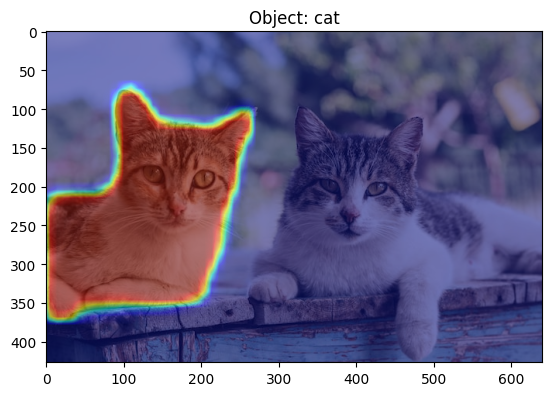

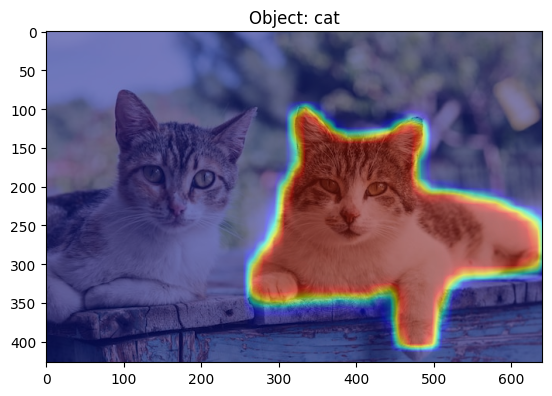

"\nPerfect! Make sure to toggle between the two images you have drawn, one for each of the top two masks. Since this is intance segmentation, each instance of a cat was assigned a separate mask. Let's learn about semantic segmentation next!\n"

In [36]:
# exercise 05

"""
Displaying soft masks

In the previous exercise, you have learned that the top two most likely objects the Mask R-CNN model has segmented are both cats. Now, you will display the masks for these two cats overlaid on top of the original image to visually verify their accuracy. This will require iterating over the two masks, and for each of them, plotting the original image followed by a semi-transparent mask on top of it.
"""

# Instructions

"""

    Extract masks and labels from the prediction, assigning them to masks and labels, respectively.

    Inside the for-loop, display the i-th mask over the image by passing mask[i, 0] to the plotting function, using the "jet" color map and setting the transparency parameter to 0.5.

"""

# solution

# Extract masks and labels from prediction
masks = prediction[0]['masks']
labels = prediction[0]['labels']

# Plot image with two overlaid masks
for i in range(2):
    plt.imshow(image)
    # Overlay the i-th mask on top of the image
    plt.imshow(masks[i,0], cmap='jet', alpha=0.5)
    plt.title(f"Object: {class_names[labels[i]]}")
    plt.show()

#----------------------------------#

# Conclusion

"""
Perfect! Make sure to toggle between the two images you have drawn, one for each of the top two masks. Since this is intance segmentation, each instance of a cat was assigned a separate mask. Let's learn about semantic segmentation next!
"""

In [38]:
import torch.nn as nn

In [39]:
# exercise 06

"""
Building a U-Net: layers definitions

In this and the next exercise, you will construct a U-Net architecture from scratch. Here, you start with defining the __init__() method where you will define layers and blocks of layers for the model to use.

The encoder and transposed convolution have already been defined for you. What's left is the decoder's convolutional blocks. You need to pass the appropriate number of input and output channels to each of them, taking into account the skip connections.

The first block, dec1, will take as input the concatenation of upconv3 output with the enc3 output. The dec1 output, in turn, should be equal to enc3 output. Can you fill-in all the missing input and output sizes?
"""

# Instructions

"""
Define the three convolutional blocks in the decoder by passing the appropriate number of input and output channels to each of them.
"""

# solution

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()

        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        
        # Define the decoder blocks
        self.dec1 = self.conv_block(512, 256)
        self.dec2 = self.conv_block(256, 128)
        self.dec3 = self.conv_block(128, 64)

        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

#----------------------------------#

# Conclusion

"""
Great job, this one wasn't easy! With all the layers defined, you can now proceed to constructing the forward() method.
"""

"\nGreat job, this one wasn't easy! With all the layers defined, you can now proceed to constructing the forward() method.\n"

In [6]:
# exercise 07

"""
Building a U-Net: forward method

With the encoder and decoder layers defied, you can now implement the forward() method of the U-net. The inputs have already been passed through the encoder for you. However, you need to define the last decoder block.

The goal of the decoder is to upsample the feature maps so that its output is of the same height and width as the U-Net's input image. This will allow you to obtain pixel-level semantic masks.
"""

# Instructions

"""

    Define the last decoder block, using torch.cat() to form the skip connection.

"""

# solution

def forward(self, x):
    x1 = self.enc1(x)
    x2 = self.enc2(self.pool(x1))
    x3 = self.enc3(self.pool(x2))
    x4 = self.enc4(self.pool(x3))

    x = self.upconv3(x4)
    x = torch.cat([x, x3], dim=1)
    x = self.dec1(x)

    x = self.upconv2(x)
    x = torch.cat([x, x2], dim=1)
    x = self.dec2(x)

    # Define the last decoder block with skip connections
    x = self.upconv1(x)
    x = torch.cat([x, x1], dim=1)
    x = self.dec3(x)

    return self.out(x)

#----------------------------------#

# Conclusion

"""
That's a good U-Net you've built there! Let's use a trained U-Net to make predictions next.
"""

'\n\n'

In [41]:
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()

        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        
        # Define the decoder blocks
        self.dec1 = self.conv_block(512, 256)
        self.dec2 = self.conv_block(256, 128)
        self.dec3 = self.conv_block(128, 64)

        self.out = nn.Conv2d(64, out_channels, kernel_size=1)


    def forward(self, x):
        x1 = self.enc1(x)
        x2 = self.enc2(self.pool(x1))
        x3 = self.enc3(self.pool(x2))
        x4 = self.enc4(self.pool(x3))
    
        x = self.upconv3(x4)
        x = torch.cat([x, x3], dim=1)
        x = self.dec1(x)
    
        x = self.upconv2(x)
        x = torch.cat([x, x2], dim=1)
        x = self.dec2(x)
    
        # Define the last decoder block with skip connections
        x = self.upconv1(x)
        x = torch.cat([x, x1], dim=1)
        x = self.dec3(x)
    
        return self.out(x)

In [7]:
# exercise 08

"""
Running semantic segmentation

Good job designing the U-Net! You will find an already pre-trained model very similar to the one you have just built available to you. This model has been trained on a large set of images and contains a few small additions to the architecture, such as the batch norm layers.

You can instantiate the model as UNet(), which will provide the model with the pre-trained weights. You task is to use it to produce segmentation masks for the following image of a car.

car image

Image from PIL has already been imported for you.
"""

# Instructions

"""

    Instantiate UNet() in a variable called model.
    Load the image at car.jpg to a variable called image.
    Produce segmentation masks by passing the image to the model and squeeze(0)-ing the output.

"""

# solution

# Load model
model = UNet()
model.eval()

# Load and transform image
image = Image.open('car.jpg')
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image).unsqueeze(0)

# Predict segmentation mask
with torch.no_grad():
    prediction = model(image_tensor).squeeze(0)

# Display mask
plt.imshow(prediction[1, :, :])
plt.show()

#----------------------------------#

# Conclusion

"""
Fantastic! The mask might not be perfect but remember we are using a model pre-trained on different data. Fine-tuning it no car images should improve the results. Let's move on to the last topic in image segmentation: panoptic segmentation!
"""

'\n\n'

In [8]:
# exercise 09

"""
Setup up semantic masks

A common way to perform panoptic segmentation is to combine together the outputs of semantic and instance segmentation. Consider the following image of a New York street.

street image

Your task is to segment it panoptically, such that each cab is identified as a separate object, while distinguishing between the asphalt and building backgrounds.

To achieve it, you will start by producing a semantic mask with a pre-trained U-Net, available to you as UNet(). Hopefully, it should distinguish between the two background types (but not between particular cabs)!
"""

# Instructions

"""

    Instantiate the U-Net model as model.
    Generate semantic_masks by passing the input image tensor to the model.
    Create single semantic mask by choosing the highest-probability class for each pixel.

"""

# solution

# Instantiate the model
model = UNet()

# Produce semantic masks for the input image
with torch.no_grad():
    semantic_masks = model(image_tensor)

# Choose highest-probability class for each pixel
semantic_mask = torch.argmax(semantic_masks, dim=1)

# Display the mask
plt.imshow(semantic_mask.squeeze(0))
plt.axis("off")
plt.show()

#----------------------------------#

# Conclusion

"""
Good job producing the semantic mask! It will serve as a backgroud on which you will overlay instance masks next!
"""

'\n\n'

In [9]:
# exercise 10

"""
Overlay instance masks

Good job producing the semantic mask in the previous exercise! Now, you can overwrite it with instance masks in the locations where the objects have been identified by the instance segmentation model.

You will use the pre-trained MaskRCNN available in your workspace to produce instance segmentation masks. Then, you will loop over these masks and for each of them, you will overlay the parts where an object is detected with high certainty on top of the semantic mask.

torch is already imported for you.
"""

# Instructions

"""

    Initialize panoptic_mask by cloning the semantic_mask.
    
    Define the for-loop to iterate over the instance masks, calling the 
    iterator variable mask.
    
    For each instance mask, in location where it is larger than 0.5, overwrite the panoptic mask with the current istance_id.

"""

# solution

# Instantiate model and produce instance masks
model = MaskRCNN()
with torch.no_grad():
    instance_masks = model(image_tensor)[0]["masks"]

# Initialize panoptic mask as semantic_mask
panoptic_mask = torch.clone(semantic_mask)

# Iterate over instance masks
instance_id = 3
for mask in instance_masks:
    # Set panoptic mask to instance_id where mask > 0.5
    panoptic_mask[mask > 0.5] = instance_id
    instance_id += 1
    
# Display panoptic mask
plt.imshow(panoptic_mask.squeeze(0))
plt.axis("off")
plt.show()

#----------------------------------#

# Conclusion

"""
Congratulations! Now you can combine semantic and instance segmentation outputs to produce panoptic masks! Notice how each cab and even is segmented as a separate object, while the buildings background is distinguished from the street.
"""

'\n\n'